<a href="https://colab.research.google.com/github/hooroobaby/NCUECTech/blob/main/ECT_HW10_107403037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("Final.csv", error_bad_lines=False)

In [ ]:
df = df.drop(['Unnamed: 3608', 'yo.app.free.permission.C2D_MESSAGE','you.in.spark.energy.permission.C2D_MESSAGE','your_package_name.permission.MAPS_RECEIVE','za.co.discovery.consumer.permission.C2D_MESSAGE','zayhu.permission.ACCESS_SVC','zing.zalo.permission.ZALO_SERVICE', 'android.permission.READ_SMS.1'], axis=1)
df

,com.google.android.googleapps.permission.GOOGLE_AUTH.wise,com.google.android.googleapps.permission.GOOGLE_AUTH.speech,com.google.android.googleapps.permission.GOOGLE_AUTH.sierrasandbox,android.permission.DISABLE_KEYGUARD,android.permission.WRITE_SOCIAL_STREAM,android.permission.RECEIVE_BOOT_COMPLETED,com.google.android.googleapps.permission.GOOGLE_AUTH.android,android.permission.WRITE_SETTINGS,android.permission.RECEIVE_WAP_PUSH,android.permission.WRITE_CALENDAR,...,vsin.t16_funny_photo.permission.C2D_MESSAGE,wb.receipts.permission.C2D_MESSAGE,wikem.chris.permission.C2D_MESSAGE,willcom.android.permission.RECEIVE_PHS_STATE,works.examples.Syllabus.permission.C2D_MESSAGE,wsj.reader_sp.permission.C2D_MESSAGE,wsj.reader_sp.permission.RECEIVE_ADM_MESSAGE,wsj.reader_sp.permission.UA_DATA,xcxin.filexpert.permission.C2D_MESSAGE,Mal
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9695,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9696,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9697,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split

In [ ]:
np.any(np.isnan(df))
np.all(np.isfinite(df))

False

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
X = df[df.columns[:-1]]
y=df[["Mal"]]
X_train, X_test, y_train, y_test = train_test_split(X.values, y,test_size=0.2,random_state=100)

# SVM

In [ ]:
from sklearn import svm
modelsvm=svm.SVC(kernel='rbf',C=1,gamma='scale')
modelsvm.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1)

In [ ]:
y_pred1 = modelsvm.predict(X_test)
y_pred1

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
print("SVM model的accuracy：",modelsvm.score(X_test, y_test))

SVM model的accuracy： 0.9788659793814433


In [ ]:
print("trainning data的accuracy：",modelsvm.score(X_train,y_train))
print("test data的accuracy：",modelsvm.score(X_test, y_test))

trainning data的accuracy： 0.9858229153241397
test data的accuracy： 0.9788659793814433


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       824
           1       0.98      0.98      0.98      1116

    accuracy                           0.98      1940
   macro avg       0.98      0.98      0.98      1940
weighted avg       0.98      0.98      0.98      1940



# RandomForest

In [ ]:
# 建立 random forest 模型
forest = ensemble.RandomForestClassifier(n_estimators = 2400)
forest.fit(X_train, y_train)

<ipython-input-44-1f9f44d4c94c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=2400)

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
print("RandomForest的accuracy：",metrics.accuracy_score(y_test, y_pred))

RandomForest的accuracy： 0.979381443298969


# CNN

In [ ]:
X = df[df.columns[:-1]]
y=df[["Mal"]]
X_train, X_test, y_train, y_test = train_test_split(X.values, y,test_size=0.2,random_state=100)

In [ ]:
X_train.shape[-1]

3600

In [ ]:
from numpy import *
X_train = np.reshape(X_train, (X_train.shape[0], 60 ,60, 1))
# X_train = X_train.reshape(-1, 28, 28, 1)
X_train.dtype

dtype('float64')

In [ ]:
X_train = X_train.astype("uint8")
X_train = array(X_train)
X_train.dtype

dtype('uint8')

In [ ]:
X_train.shape

(7759, 60, 60, 1)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], 60, 60, 1)).astype("uint8")
X_test = array(X_test)
X_test.dtype

dtype('uint8')

In [ ]:
X_test.shape

(1940, 60, 60, 1)

In [ ]:
# y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1)).astype("uint8")
# y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1)).astype("uint8")
# X_train = X_train / 255
# X_test = X_test / 255

In [ ]:
from keras.utils import np_utils
# 使用one-hot進行轉換
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_train_one = np_utils.to_categorical(y_train)
y_test_one = np_utils.to_categorical(y_test)

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
# 建立簡單的線性執行的模型
model = Sequential()
# ----------------------------------------------------------------
# Add Input layer
# 輸出16個60*60個影像
model.add(Conv2D(16,3, padding='same', activation='relu', input_shape=(60, 60, 1)))
# Pooling=>16個30*30
model.add(MaxPooling2D(pool_size=(2, 2)))

# 第2個Convolution=>36個30*30
model.add(Conv2D(32,3, padding='same', activation='relu'))
# 第2次Pooling=>36個15*15
model.add(MaxPooling2D(pool_size=(2, 2)))

# 第3次Convolution=>64個15*15
model.add(Conv2D(64,3, padding='same', activation='relu'))
# 第3次Pooling=>64個15/2*15/2
model.add(MaxPooling2D(pool_size=(2, 2)))

# # 第3次Convolution=>64個64*64
# model.add(Conv2D(16,3, padding='same', activation='relu'))
# # 第2次Pooling=>64個32*32
# model.add(MaxPooling2D(pool_size=(2, 2)))
# ------------------------------------------------------------------
# Dropout=>減少過度儗和，繞每次batch run都丟棄0.25的neuron
model.add(Dropout(0.2))
# Flatten=>轉一維=>63*32*32
model.add(Flatten())
# connected
model.add(Dense(512, activation='relu'))

# model.add(Dropout(0.5)) #可有可無

# output layer=>因為我只有0/1=>用sigmoid
model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 60, 60, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 16)         

In [ ]:
# 選擇損失函數、優化方法及成效衡量方式==>定義model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [ ]:
# 進行訓練, 訓練過程會存在history
history = model.fit(x=X_train, y=y_train_one, validation_split=0.2, epochs=20, batch_size=800, verbose=2)

Epoch 1/50
8/8 - 34s - loss: 0.6730 - accuracy: 0.5951 - val_loss: 0.6436 - val_accuracy: 0.5838
Epoch 2/50
8/8 - 29s - loss: 0.5862 - accuracy: 0.6808 - val_loss: 0.4886 - val_accuracy: 0.7629
Epoch 3/50
8/8 - 31s - loss: 0.4329 - accuracy: 0.8165 - val_loss: 0.3501 - val_accuracy: 0.8544
Epoch 4/50
8/8 - 30s - loss: 0.3521 - accuracy: 0.8695 - val_loss: 0.2853 - val_accuracy: 0.8866
Epoch 5/50
8/8 - 30s - loss: 0.2782 - accuracy: 0.9029 - val_loss: 0.2200 - val_accuracy: 0.9227
Epoch 6/50
8/8 - 31s - loss: 0.2210 - accuracy: 0.9225 - val_loss: 0.1850 - val_accuracy: 0.9356
Epoch 7/50
8/8 - 30s - loss: 0.1961 - accuracy: 0.9306 - val_loss: 0.1775 - val_accuracy: 0.9381
Epoch 8/50
8/8 - 30s - loss: 0.1734 - accuracy: 0.9378 - val_loss: 0.1622 - val_accuracy: 0.9433
Epoch 9/50
8/8 - 30s - loss: 0.1594 - accuracy: 0.9407 - val_loss: 0.1466 - val_accuracy: 0.9407
Epoch 10/50
8/8 - 31s - loss: 0.1440 - accuracy: 0.9468 - val_loss: 0.1378 - val_accuracy: 0.9459
Epoch 11/50
8/8 - 32s - loss:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


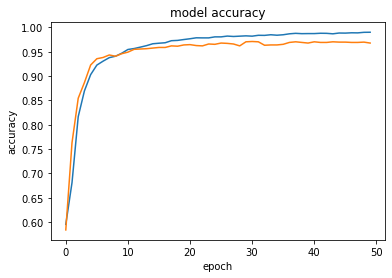

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

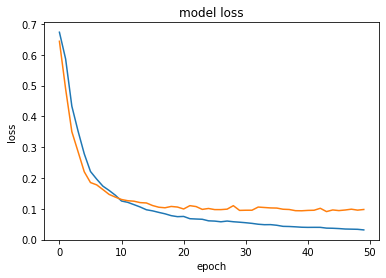

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test_one)

scores[1]

61/61 [==============================] - 2s 35ms/step - loss: 0.0822 - accuracy: 0.9742


0.9742268323898315

# LeNet

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras import backend as k
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LeNet:
     @staticmethod
     def build(input_shape, classes):
         # Defining the model to be used
         model = Sequential()
         # Adding the layers
         model.add(Conv2D(20, kernel_size=5, activation='relu', padding='same', input_shape=input_shape))
         model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
         model.add(Conv2D(50, kernel_size=5, activation='relu'))
         model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
         model.add(Flatten())
         model.add(Dense(500, activation='relu'))
         model.add(Dense(classes, activation='softmax'))
         return model


In [ ]:
# Hyperparameter Definition
BATCH_SIZE=128
EPOCHS = 20
IP_SHAPE = (60, 60, 1)
# k.set_image_dim_ordering('th')

# Building the model
model = LeNet.build(input_shape=IP_SHAPE, classes=2)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train_one, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=True, validation_split=0.25)
score=model.evaluate(X_test, y_test_one, verbose=True)
print("Test Score : ", score[0])
print("Test Accuracy : ", score[1])
print(history.history.keys())

Epoch 1/20
46/46 [==============================] - 37s 457ms/step - loss: 0.4176 - accuracy: 0.8193 - val_loss: 0.1469 - val_accuracy: 0.9438
Epoch 2/20
46/46 [==============================] - 19s 419ms/step - loss: 0.1165 - accuracy: 0.9582 - val_loss: 0.1110 - val_accuracy: 0.9557
Epoch 3/20
46/46 [==============================] - 19s 405ms/step - loss: 0.0942 - accuracy: 0.9678 - val_loss: 0.0996 - val_accuracy: 0.9660
Epoch 4/20
46/46 [==============================] - 17s 376ms/step - loss: 0.0691 - accuracy: 0.9763 - val_loss: 0.0911 - val_accuracy: 0.9691
Epoch 5/20
46/46 [==============================] - 17s 363ms/step - loss: 0.0621 - accuracy: 0.9790 - val_loss: 0.1077 - val_accuracy: 0.9639
Epoch 6/20
46/46 [==============================] - 17s 368ms/step - loss: 0.0648 - accuracy: 0.9792 - val_loss: 0.0902 - val_accuracy: 0.9696
Epoch 7/20
46/46 [==============================] - 17s 366ms/step - loss: 0.0526 - accuracy: 0.9845 - val_loss: 0.0872 - val_accuracy: 0.9722

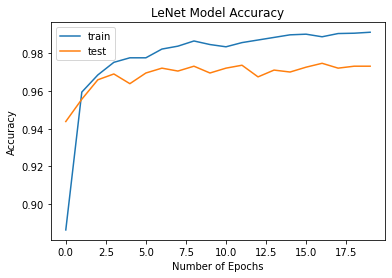

In [ ]:
# Accuracy Visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("LeNet Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()